In [1]:
import random
import gym
import sys
import numpy as np
from collections import deque,namedtuple
import os
import time 
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.optim import Adam
from agent import *
plt.style.use('seaborn')

In [2]:
def plot_agent_rewards(agent):
    fig, ax = plt.subplots(1,figsize=(10,8))
    ax.plot(agent.rewards)
    ax.set_title("Agent Reward Progression across Episodes", fontsize = 16)
    ax.set_ylabel('Reward', fontsize = 14)
    ax.set_xlabel('Episodes', fontsize = 14)
    plt.show()
    training_time = agent.get_train_time()
    print('Training Time: {:.2f}s'.format(training_time))
    print("Number of episodes: ", agent.n_episodes)
    print("Batch Size: ", agent.batch_size)
    print("Discount Factor: ", agent.gamma)
    print("Learning Rate: ", agent.lr)
    print("Epsilong Decay: ", agent.decay)


In [3]:
env = gym.make('CartPole-v1')
s = env.reset()

In [4]:
n_episodes=500
batch_size=128
gamma = 0.98
lr = 0.0001
eps = 1.0
decay = 0.95

In [5]:
agent1 = Agent(env)
agent1.init_hyperparameters(n_episodes, batch_size, gamma, lr, decay)

In [6]:
agent1.print_env_settings()

State space:  4
Action space:  2


In [7]:
agent1.train()

C:\Users\laure\OneDrive\projects\reinforcement_learning\cart_pole\agent.py:88: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ..\torch\csrc\utils\tensor_new.cpp:201.)
  s = torch.FloatTensor([t.s for t in batch])


Episode:  100
Transition Count:  82
Episode Reward:  82.0
Episode:  200
Transition Count:  168
Episode Reward:  168.0
Episode:  300
Transition Count:  179
Episode Reward:  179.0
Episode:  400
Transition Count:  281
Episode Reward:  281.0


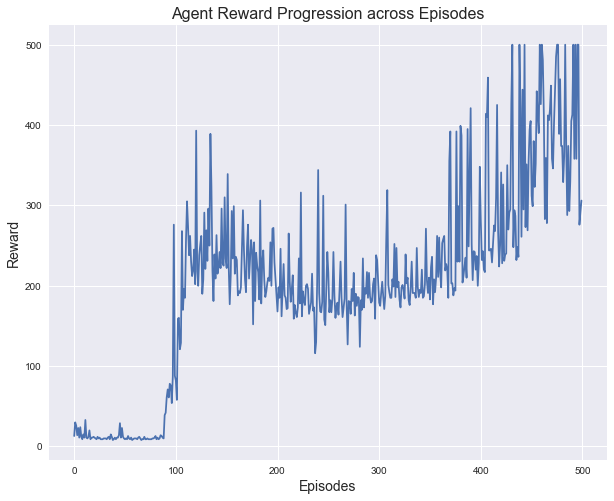

Training Time: 723.46s
Number of episodes:  500
Batch Size:  128
Discount Factor:  0.98
Learning Rate:  0.0001
Epsilong Decay:  0.95


In [8]:
plot_agent_rewards(agent1)

The reason that potentially the agent learns how to achieve top reward of 500 then sometimes drop in between and at some point even repetitively misses the target might be due to high level of gamma which makes value updating a bit too slow. 

In [9]:
s = env.reset()
n_episodes=500
batch_size=256
gamma = 0.95
lr = 0.001
decay = 0.99

In [10]:
agent2 = Agent(env)
agent2.init_hyperparameters(n_episodes, batch_size, gamma, lr, decay)

In [11]:
agent2.train()

Episode:  100
Transition Count:  83
Episode Reward:  83.0
Episode:  200
Transition Count:  186
Episode Reward:  186.0
Episode:  300
Transition Count:  172
Episode Reward:  172.0
Episode:  400
Transition Count:  150
Episode Reward:  150.0


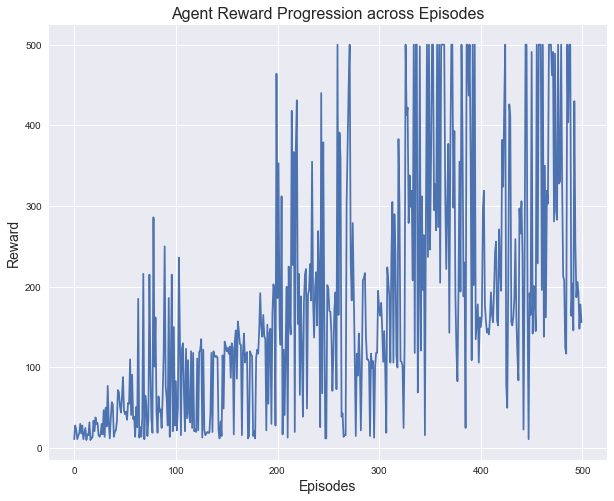

Training Time: 855.99s
Number of episodes:  500
Batch Size:  256
Discount Factor:  0.95
Learning Rate:  0.001
Epsilong Decay:  0.99


In [12]:
plot_agent_rewards(agent2)

Here our agent does some progress but doesn't reach the state with maximum reward any! Perhaps the discount factor here is too high or the learning rate is too high and the agent cannot properly find the optimal solution.

In [13]:
s = env.reset()
n_episodes=500
batch_size=128
gamma = 0.99
lr = 0.01
decay = 0.98

In [14]:
agent3 = Agent(env)
agent3.init_hyperparameters(n_episodes, batch_size, gamma, lr, decay)

In [15]:
agent3.train()

Episode:  100
Transition Count:  53
Episode Reward:  53.0
Episode:  200
Transition Count:  500
Episode Reward:  500.0
Episode:  300
Transition Count:  223
Episode Reward:  223.0
Episode:  400
Transition Count:  500
Episode Reward:  500.0


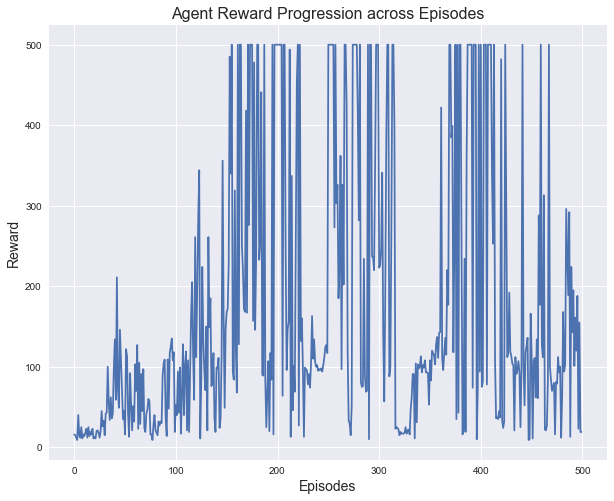

Training Time: 741.66s
Number of episodes:  500
Batch Size:  128
Discount Factor:  0.99
Learning Rate:  0.01
Epsilong Decay:  0.98


In [16]:
plot_agent_rewards(agent3)

In this case the learning rate is much higher and the agent finds the optimal solution quickly but because the learning rate is so high, it is possible through Adam optimizer to leave a good local minimum to a worse one. While it seems great to have found the solution quickly, it's not very robust and the agent will keep missing some episodes. Ideally we'd want to have a similar discount factor but lower learning rate with perhaps more episodes to make sure the agent learns well. 